### EDA On E-Commerce Shipping data

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Loading dataset and getting basic info about data

In [3]:
df = pd.read_csv("data/ecommerce_shipping_data.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


Checking null values

In [6]:
df.isnull().sum().sum()

np.int64(0)

**no null values present**

### Data Cleaning

Handling duplicated values

In [8]:
df.duplicated().any()

np.False_

In [ ]:
print("Shpae of dataset before removing duplicates", df.shape)
duplicates_dropped = df.drop_duplicates()
print("Shpae of dataset after removing duplicates", df.shape)

Shpae of dataset before removing duplicates (10999, 12)
Shpae of dataset after removing duplicates (10999, 12)


**no duplicated samples**

Categorical and Continuous features

In [7]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [66]:
categorical_col = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
continuous_col = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

### Checking value counts of categorical columns

##### Using Barplot

In [9]:
# pi = df["Gender"].value_counts()
# print(pi)

fig = go.Figure()
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Warehouse Block", "Product Importance", "Mode of Shipment", "Gender")
)

x_block=['A', 'B', 'C', 'D']
x_product = ['low', 'medium', 'high']
x_mode = ['Ship', 'Flight', 'Road']
x_gender = ['Female', 'Male']
fig.add_trace(go.Bar(x=x_block, y = df["Warehouse_block"].value_counts()), row=1, col=1)
fig.add_trace(go.Bar(x=x_product, y = df["Product_importance"].value_counts()), row=1, col=2)
fig.add_trace(go.Bar(x=x_mode,y = df["Mode_of_Shipment"].value_counts()), row=2, col=1)
fig.add_trace(go.Bar(x=x_gender, y = df["Gender"].value_counts()), row=2, col=2)

fig.update_layout(barmode='stack', title="Value Count plots of Categorical Columns")
fig.show()


##### Using Pie Chart

In [45]:
categorical_col = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

fig = go.Figure()
fig = make_subplots(
    rows=2, cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=("Warehouse Block", "Product Importance", "Mode of Shipment", "Gender")
)

positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for idx,col in enumerate(categorical_col):
    row, col_pos = positions[idx]
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'Count']

    pie_fig = px.pie(value_counts, values='Count', names=col, color=col)

    pie_trace = pie_fig.data[0]
    pie_trace.textinfo = 'label+percent'
    pie_trace.textposition = 'inside'
    fig.add_trace(pie_trace, row=row, col=col_pos)
  
fig.update_layout(
    height=700, width=800,
    title_text="Pie Charts for Value Counts of Categorical Columns"
)
fig.show()

In [38]:
value_counts = df['Warehouse_block'].value_counts().reset_index()
value_counts.columns = ['Warehouse_block', 'Count']
fig = px.pie(value_counts, values='Count', names='Warehouse_block', color='Warehouse_block', title='Warehouse Block')
fig.update_layout(width=400, height=500)
fig.show()

#### Checking status of product reached or not from Particular Warehouse 

In [30]:
px.histogram(
    df,
    x='Warehouse_block',
    color='Reached.on.Time_Y.N',
    barmode='group'
)

#### Through which mode of shipment how many products reached or not 

In [39]:
px.histogram(
    df,
    x='Mode_of_Shipment',
    color='Reached.on.Time_Y.N',
    barmode='group'
)

#### How many products reached or not from particular product category

In [40]:
px.histogram(
    df,
    x='Product_importance',
    color='Reached.on.Time_Y.N',
    barmode='group'
)

#### Count Products category stored in Particular Warehouse

In [41]:
px.histogram(
    df,
    x = "Warehouse_block",
    color = 'Product_importance',
    barmode='group'
)

### Checking value counts of continuous columns

In [63]:
continuous_col_small_value = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Reached.on.Time_Y.N']

fig = go.Figure()
fig = make_subplots(
    rows=2, cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=('Customer_care_calls', 'Customer_rating','Prior_purchases', 'Reached.on.Time_Y.N')
)

positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for idx,col in enumerate(continuous_col_small_value):
    row, col_pos = positions[idx]
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'Count']

    pie_fig = px.pie(value_counts, values='Count', names=col, color=col)

    pie_trace = pie_fig.data[0]
    pie_trace.textinfo = 'label+percent'
    pie_trace.textposition = 'inside'
    fig.add_trace(pie_trace, row=row, col=col_pos)
  
fig.update_layout(
    height=700, width=800,
    title_text="Pie Charts for Value Counts of Continuous Columns with Small Values"
)
fig.show()


In [111]:
import math
continuous_col_large_value = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Prior_purchases']

cols = 2
rows = math.ceil(len(continuous_col) / cols)

fig = go.Figure()
fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=continuous_col_large_value,
)

for idx,col in enumerate(continuous_col_large_value):
    row = idx // cols + 1
    col_pos = idx % cols + 1

    scatter_fig = px.scatter(df, x=col)
    fig.add_trace(scatter_fig.data[0], row=row, col=col_pos)
    
fig.update_layout(
    height=rows * 300, width=800,
    title_text="Scatterplot for Value Counts of Continuous Columns with Large values"
)
fig.show()


#### Checking relation of 'Reached.on.Time_Y.N' with continuous columns

In [67]:
continuous_col

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [68]:
px.histogram(
    df,
    x='Customer_care_calls',
    color='Reached.on.Time_Y.N',
    barmode='group'
)

In [69]:
px.histogram(
    df,
    x='Customer_rating',
    color='Reached.on.Time_Y.N',
    barmode='group'
)

In [72]:
px.histogram(
    df,
    x='Prior_purchases',
    color='Reached.on.Time_Y.N',
    barmode='group'
)

In [77]:
px.box(
    df,
    x='Cost_of_the_Product',
    color='Reached.on.Time_Y.N',
)

In [80]:
px.box(
    df,
    x='Discount_offered',
    color='Reached.on.Time_Y.N',
)

In [81]:
px.box(
    df,
    x='Weight_in_gms',
    color='Reached.on.Time_Y.N',
)

### Encode Categorical Variables

In [112]:
# one hot encoding on mode_of_shipment and gender cols as it is nominal features
# label encoding on warehouse_block and product_importance as it is ordinal features

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoding = ['Warehouse_block', 'Product_importance']
onehot_encoding = ['Mode_of_Shipment', 'Gender']
labelencoders = {}

for col in label_encoding:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    labelencoders[col] = le

df = pd.get_dummies(df, columns=onehot_encoding, drop_first=False)
df.head()

,ID,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,1,3,4,2,177,3,1,44,1233,1,True,False,False,True,False
1,2,4,4,5,216,2,1,59,3088,1,True,False,False,False,True
2,3,0,2,2,183,4,1,48,3374,1,True,False,False,False,True
3,4,1,3,3,176,4,2,10,1177,1,True,False,False,False,True
4,5,2,2,2,184,3,2,46,2484,1,True,False,False,True,False


### EDA

In [113]:
# removed unnecessary column
df.drop('ID', axis=1, inplace=True)

#### Correlation Heatmap

In [114]:
px.imshow(df.corr(), aspect=True, text_auto=True)

using plotly

In [115]:
corr = df.corr()
mask = np.triu(np.zeros_like(corr, dtype=bool))
mask[np.triu_indices_from(mask)] = True
rLT = corr.mask(mask)

text_values = rLT.round(5).astype(str)
text_values = text_values.where(~mask, '')

z_values = rLT.where(~mask, None)

heat = go.Heatmap(
    z=z_values,
    x=rLT.columns.values,
    y=rLT.columns.values,
    zmin = -0.25,
    zmax = 1,
    ygap = 1,
    colorscale = 'Reds',
    text=text_values.values,
    texttemplate="%{text}",
    textfont={"size": 10, 'color': "black"},
    hoverongaps=False
)

layout = go.Layout(
    title_text='Correlation Heatmap', 
    title_x=0.5, 
    width=1000, 
    height=800,
    xaxis=dict(tickangle=-90),
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig = go.Figure(data=[heat], layout=layout)
fig.show()

using seaborn

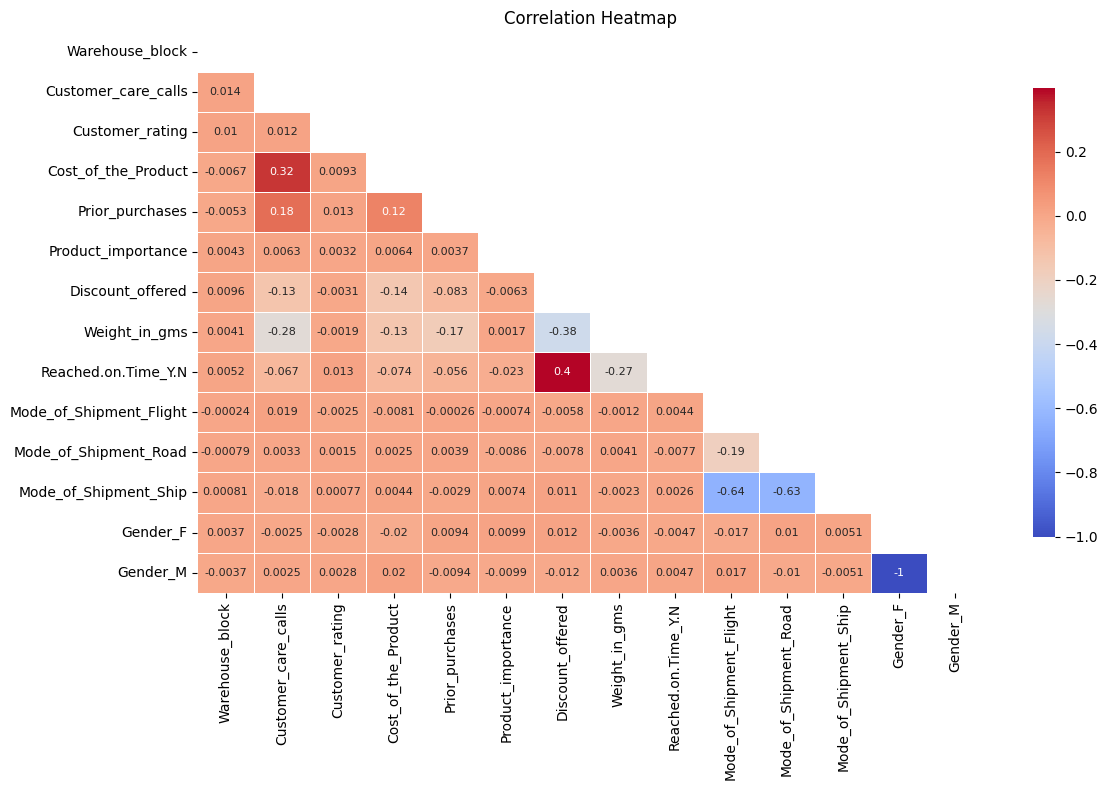

In [116]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
plt.title("Correlation Heatmap")
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 8})
plt.tight_layout()
plt.show()